Задание 1:
1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;
2. Сделать базовый анализ целевой переменной, сделать выводы;
3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;
4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;
5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?
6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.
7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from scipy.stats import probplot, ks_2samp

from sklearn.ensemble import RandomForestClassifier

In [2]:
training_data = pd.read_csv('assignment1_data/train.csv')
test_data = pd.read_csv('assignment1_data/test.csv')

## 1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [4]:
print(f'Тренировочный датасет содержит {training_data.shape[0]} строк {training_data.shape[1]} столбцов')
print(f'Тестовый датасет содержит {test_data.shape[0]} строк {test_data.shape[1]} столбцов')

Тренировочный датасет содержит 200000 строк 202 столбцов
Тестовый датасет содержит 200000 строк 201 столбцов


In [6]:
training_data.head(2)

ID_code  target    var_0   var_1    var_2  var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.389  12.3622  7.0433  5.6208   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  

[2 rows x 202 columns]

In [7]:
test_data.head(2)

ID_code    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  test_0  11.0656  7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675   
1  test_1   8.5304  1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196  18.6316   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   4.3654   
1 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773  -1.4852   

   var_197  var_198  var_199  
0  10.7200  15.4722  -8.7197  
1   9.8714  19.1293 -20.9760  

[2 rows x 201 columns]

In [5]:
print('Базовые статистики тренировочного датасета')
training_data.describe()

Базовые статистики тренировочного датасета


target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [8]:
print('Базовые статистики тестового датасета')
test_data.describe()

Базовые статистики тестового датасета


var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [15]:
# Посмотрим на пропуски
print(f'Пропусков в тренировочном датасете всего {training_data.isnull().sum().sum()}')
print(f'Пропусков в тестовом датасете всего {test_data.isnull().sum().sum()}')

Пропусков в тренировочном датасете всего 0
Пропусков в тестовом датасете всего 0


In [23]:
# Посмотрим на типы данных
print(f'В тренировочном датасете {training_data.select_dtypes(include=np.number).shape[1]} числовых признаков')
print(f'В тренировочном датасете {training_data.select_dtypes(include=np.object).shape[1]} признаков типа "object"')
print(f'В тестовом датасете {test_data.select_dtypes(include=np.number).shape[1]} числовых признаков')
print(f'В тестовом датасете {test_data.select_dtypes(include=np.object).shape[1]} признаков типа "object"')

В тренировочном датасете 201 числовых признаков
В тренировочном датасете 1 признаков типа "object"
В тестовом датасете 200 числовых признаков
В тестовом датасете 1 признаков типа "object"


Дискретные признаки

In [27]:
# Дискретные признаки
discrete_feature = [
    feature for feature in training_data.select_dtypes(include=np.number)
    if len(training_data[feature].unique())<25
]
print(f'Всего дискретных признаков в тренировочном датасете  - {len(discrete_feature)} и это признак {discrete_feature}')

Всего дискретных признаков в тренировочном датасете  - 1 и это признак ['target']


__Выводы__  
- датасеты содержат по 200 000 строк и 200 признаков  
- все признаки, за исключением `ID_code` являются непрерывными
- оба датасета не имеют пропусков

## 2. Сделать базовый анализ целевой переменной, сделать выводы;

In [28]:
training_data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

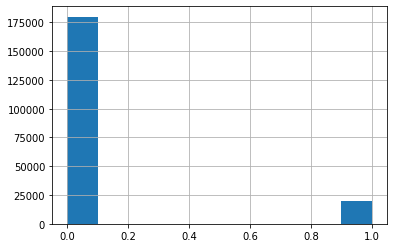

In [35]:
training_data.target.hist();

In [53]:
print(f'В тренировочном датасете количество значений целевой переменной "0" составляет \
{training_data.target.value_counts()[0] / training_data.target.value_counts().sum():.2%}')
print(f'В тренировочном датасете количество значений целевой переменной "1" составляет \
{training_data.target.value_counts()[1] / training_data.target.value_counts().sum():.2%}')

В тренировочном датасете количество значений целевой переменной "0" составляет 89.95%
В тренировочном датасете количество значений целевой переменной "1" составляет 10.05%


__Выводы__
- датасет несбалансирован
- это задача бинарной классификации

## 3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки, сделать выводы

In [54]:
features = training_data.columns.drop(['target', 'ID_code'])

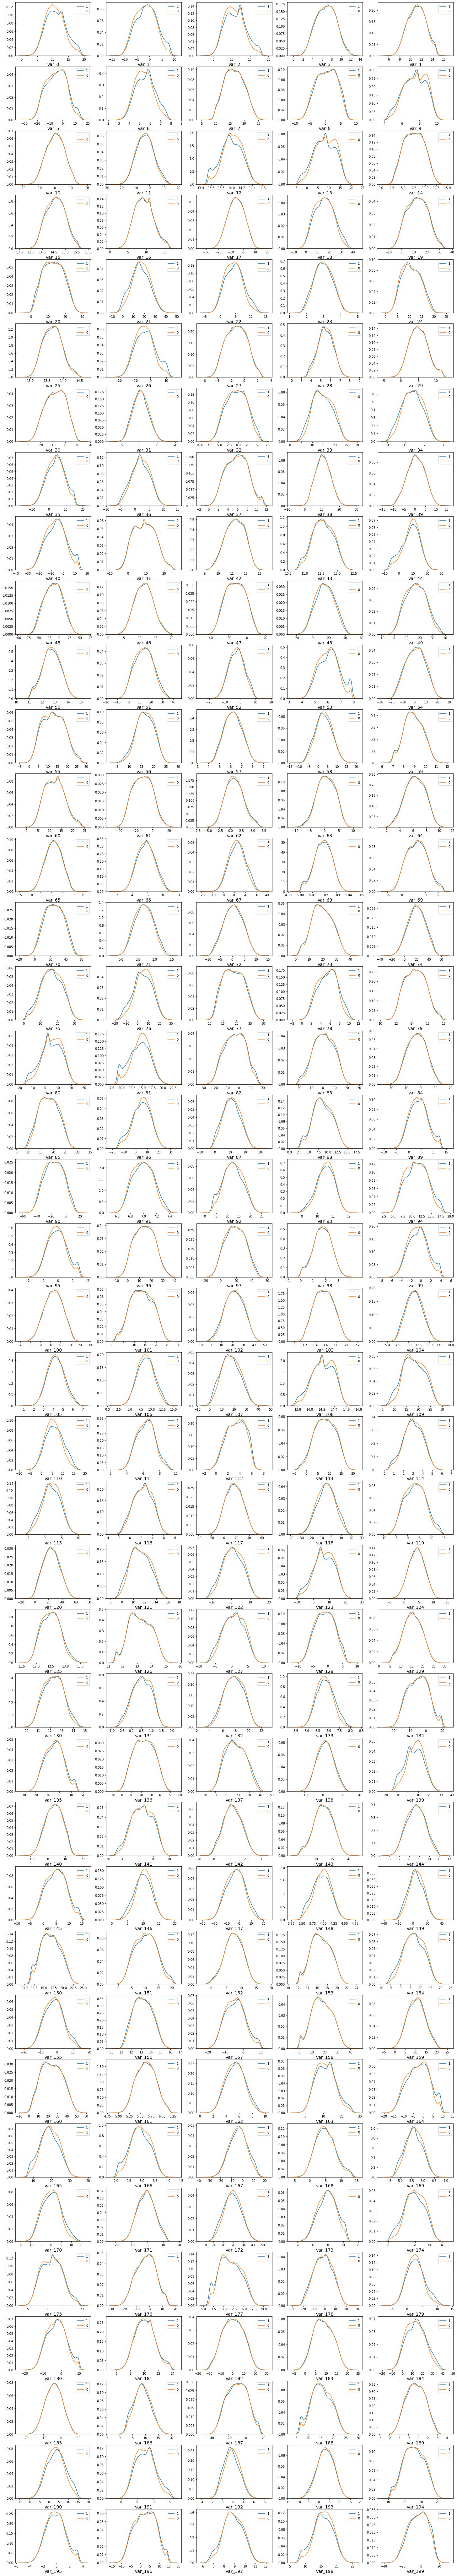

In [126]:
# распределение признаков в зависимости от значения целевой переменной
fig, axes = plt.subplots(40, 5, figsize=(25, 150))

for num, feature in enumerate(features):
    sns.kdeplot(training_data[training_data.target == 1][feature].values, ax=axes[num//5, num%5], label="1")
    sns.kdeplot(training_data[training_data.target == 0][feature].values, ax=axes[num//5, num%5], label="0")
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

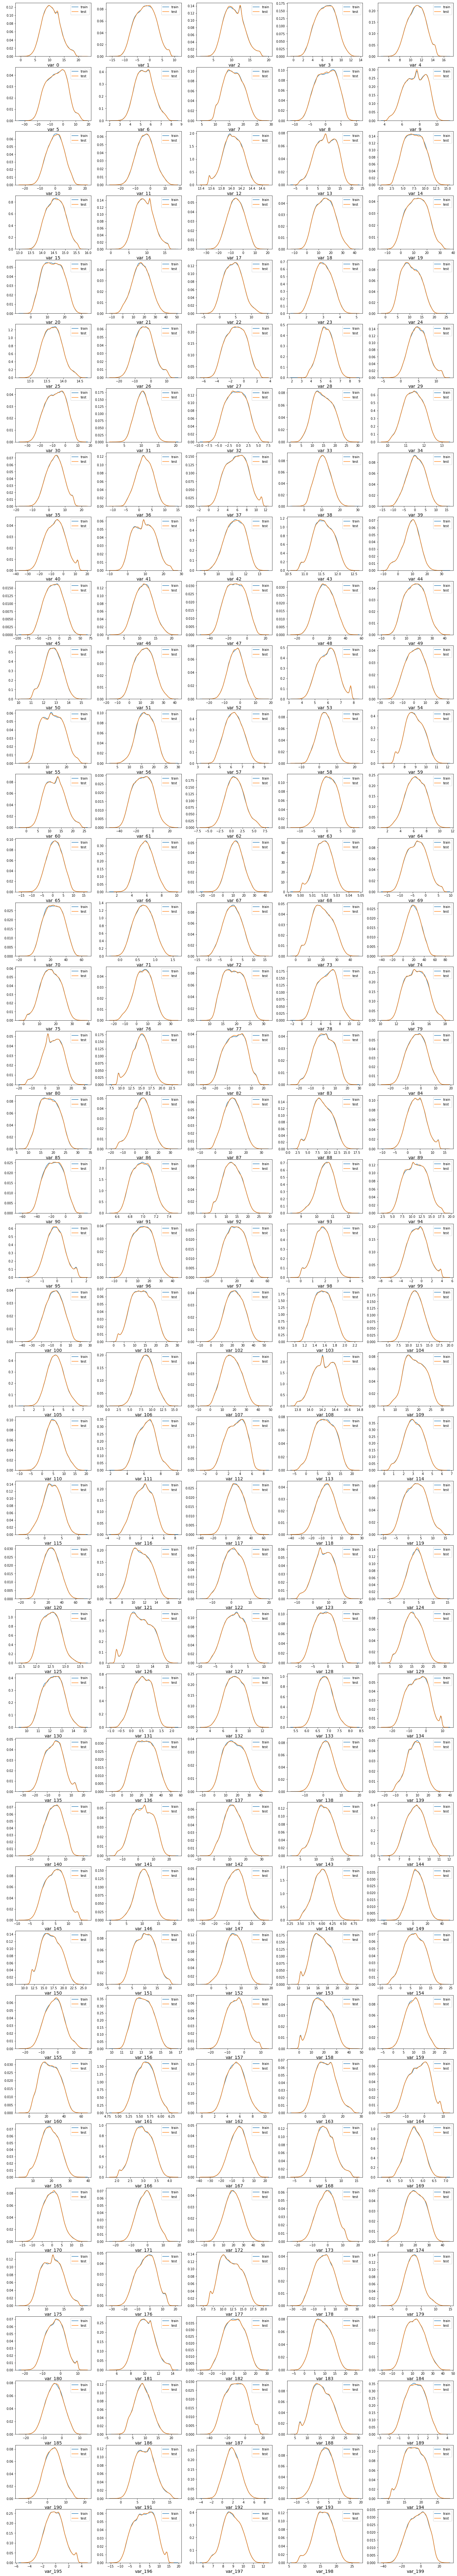

In [116]:
# распределение признаков для обучающей и тестовой выборки
fig, axes = plt.subplots(40, 5, figsize=(25, 150))

for num, feature in enumerate(features):
    sns.kdeplot(training_data[feature].values, ax=axes[num//5, num%5], label="train")
    sns.kdeplot(test_data[feature].values, ax=axes[num//5, num%5], label="test")
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

__Выводы__
- распределение признаков для обучающей и тестовой выборки практически идентичны, сильных расхождений нет
- распределение признаков в зависимости от значения целевой переменной в некоторых признаках (например 6, 12, 13, 76, 81 и др.) не полностью совпадают, что может говорить о том, что это признаки разной природы

## 4.Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы

в разрезе целевой переменной

In [136]:
# распределение средних
means_1 = [training_data[training_data['target'] == 1][feature].mean() for feature in features]
means_0 = [training_data[training_data['target'] == 0][feature].mean() for feature in features]

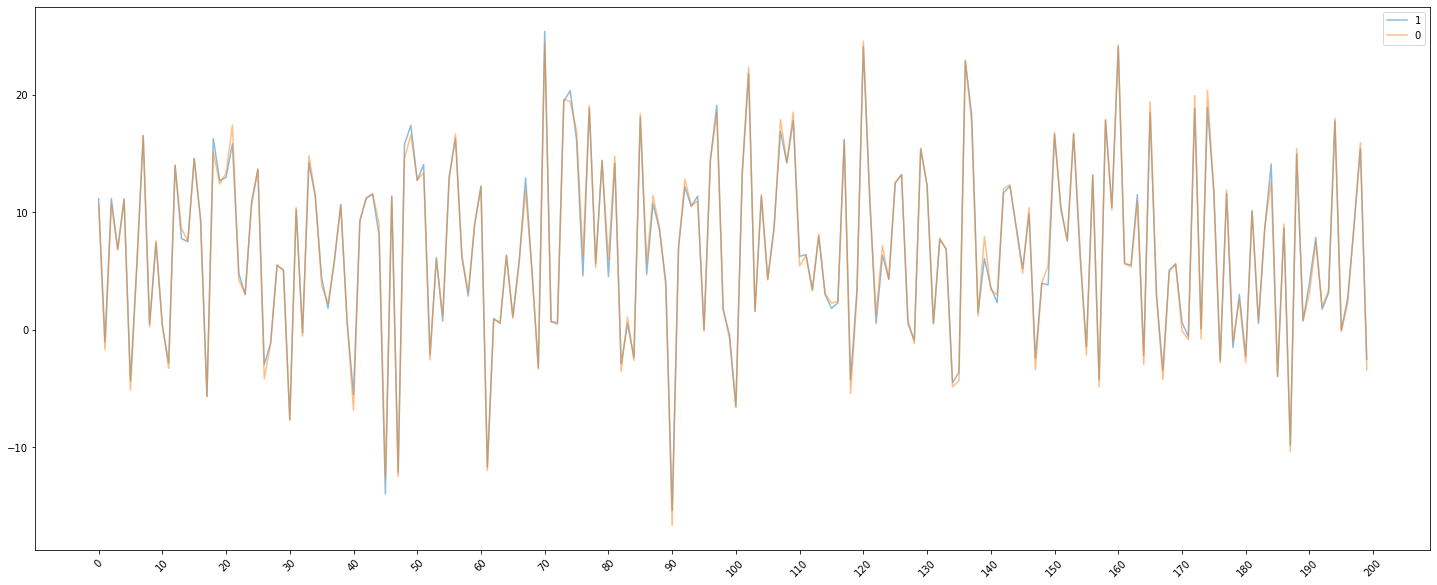

In [163]:
fig = plt.figure(figsize=(25, 10))
plt.plot(means_1, alpha=0.5)
plt.plot(means_0, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['1', '0']);

In [164]:
# распределение стандартных отклонений
std_1 = [training_data[training_data['target'] == 1][feature].std() for feature in features]
std_0 = [training_data[training_data['target'] == 0][feature].std() for feature in features]

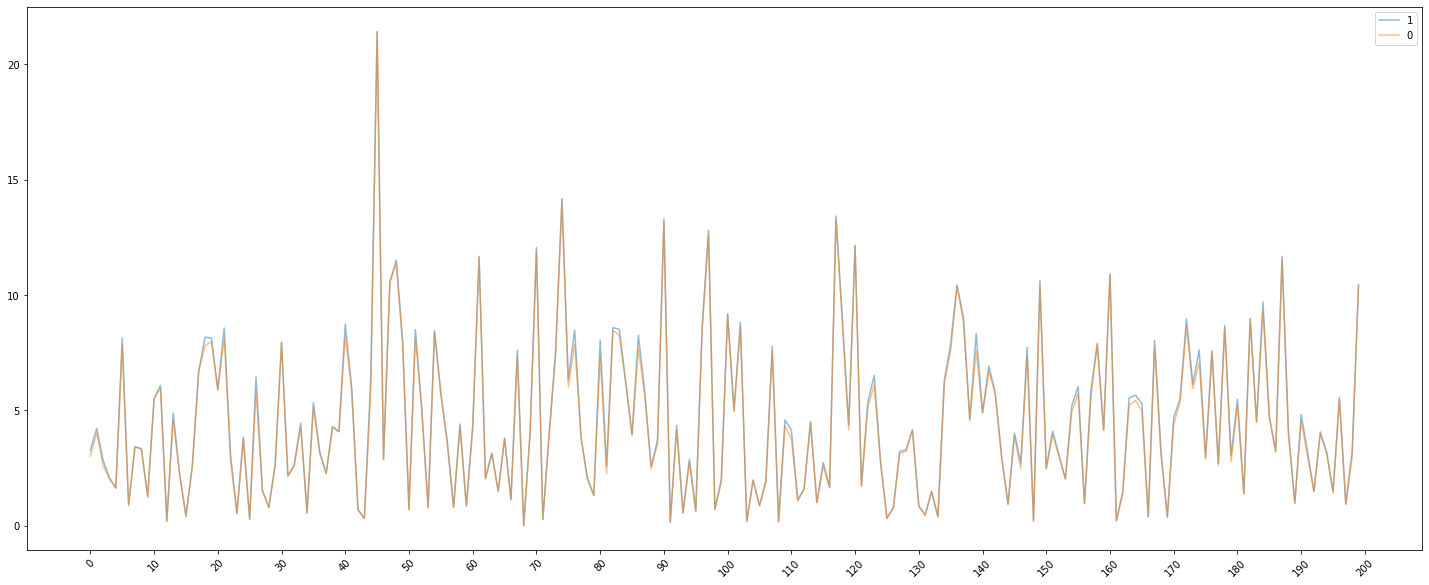

In [165]:
fig = plt.figure(figsize=(25, 10))
plt.plot(std_1, alpha=0.5)
plt.plot(std_0, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['1', '0']);

In [168]:
# распределение медиан
median_1 = [training_data[training_data['target'] == 1][feature].median() for feature in features]
median_0 = [training_data[training_data['target'] == 0][feature].median() for feature in features]

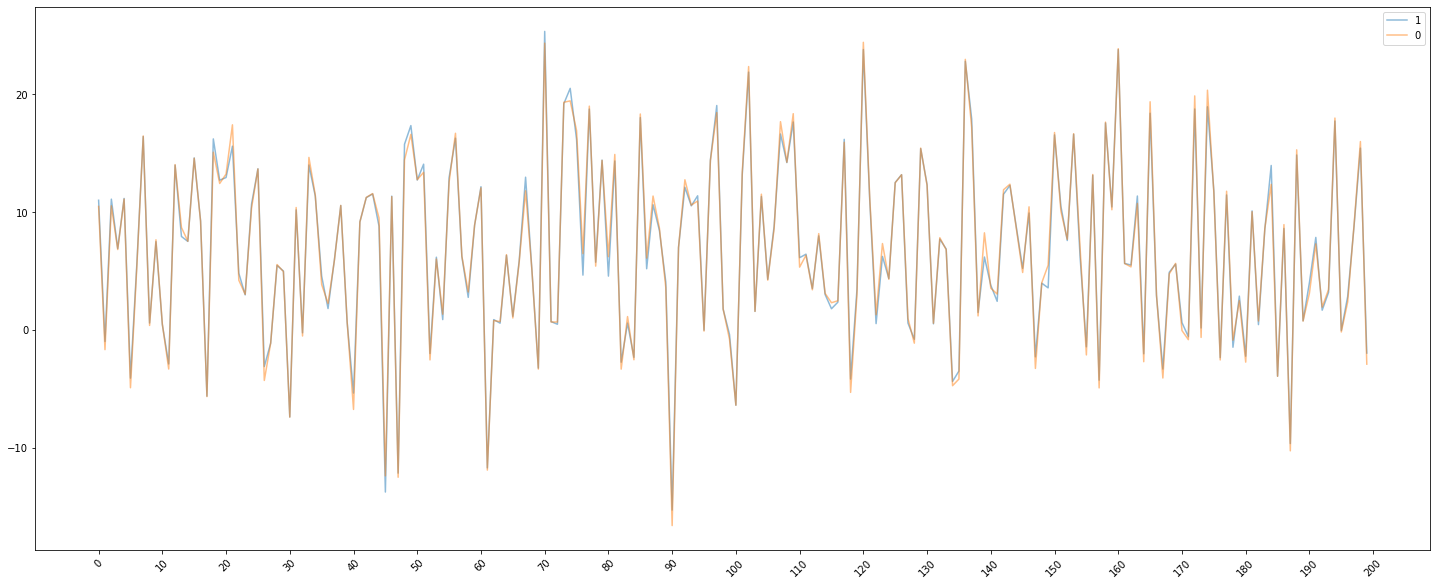

In [169]:
fig = plt.figure(figsize=(25, 10))
plt.plot(median_1, alpha=0.5)
plt.plot(median_0, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['1', '0']);

распределение основных статистик обучающей и тестовой выборки

In [171]:
# распределение средних
means_train = [training_data[feature].mean() for feature in features]
means_test = [test_data[feature].mean() for feature in features]

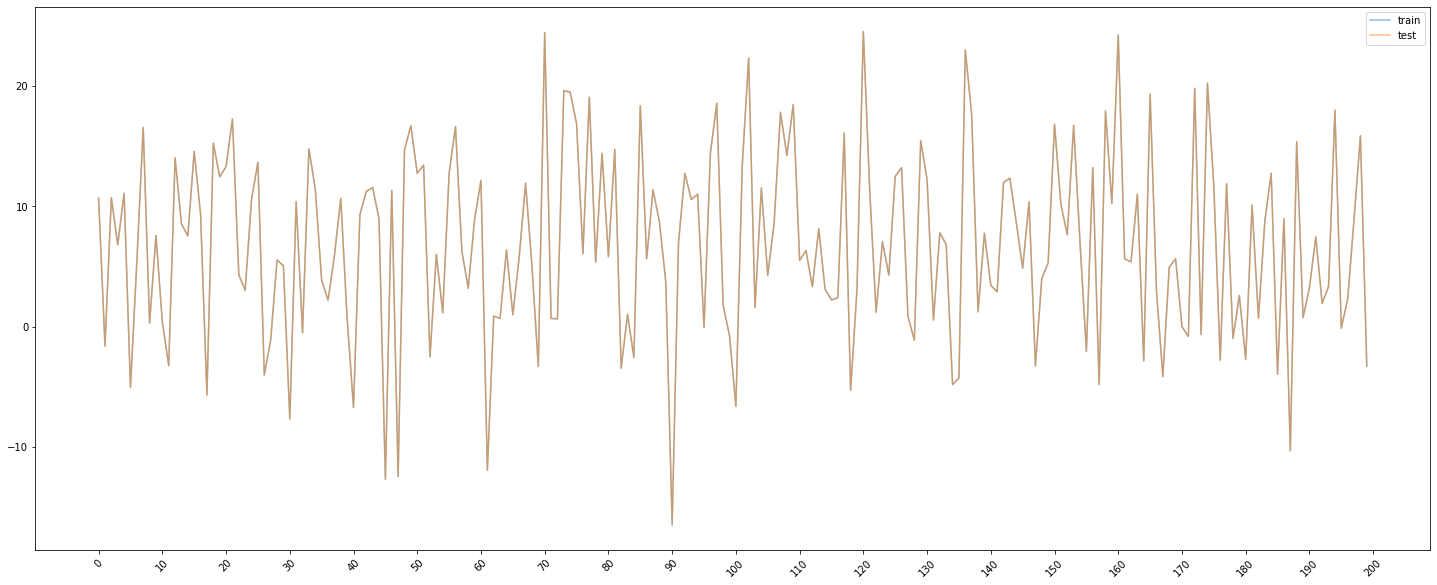

In [174]:
fig = plt.figure(figsize=(25, 10))
plt.plot(means_train, alpha=0.5)
plt.plot(means_test, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['train', 'test']);

In [175]:
# распределение стандартных отклонений
std_train = [training_data[feature].std() for feature in features]
std_test = [test_data[feature].std() for feature in features]

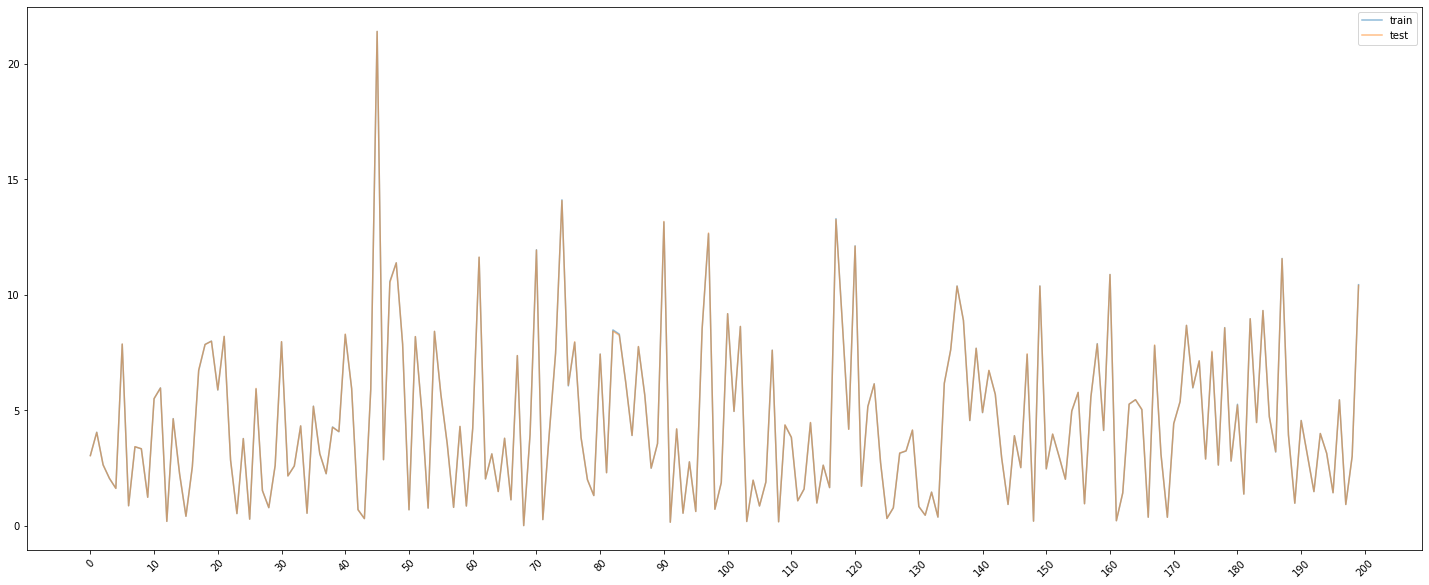

In [176]:
fig = plt.figure(figsize=(25, 10))
plt.plot(std_train, alpha=0.5)
plt.plot(std_test, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['train', 'test']);

In [177]:
# распределение медиан
median_train = [training_data[feature].median() for feature in features]
median_test = [test_data[feature].median() for feature in features]

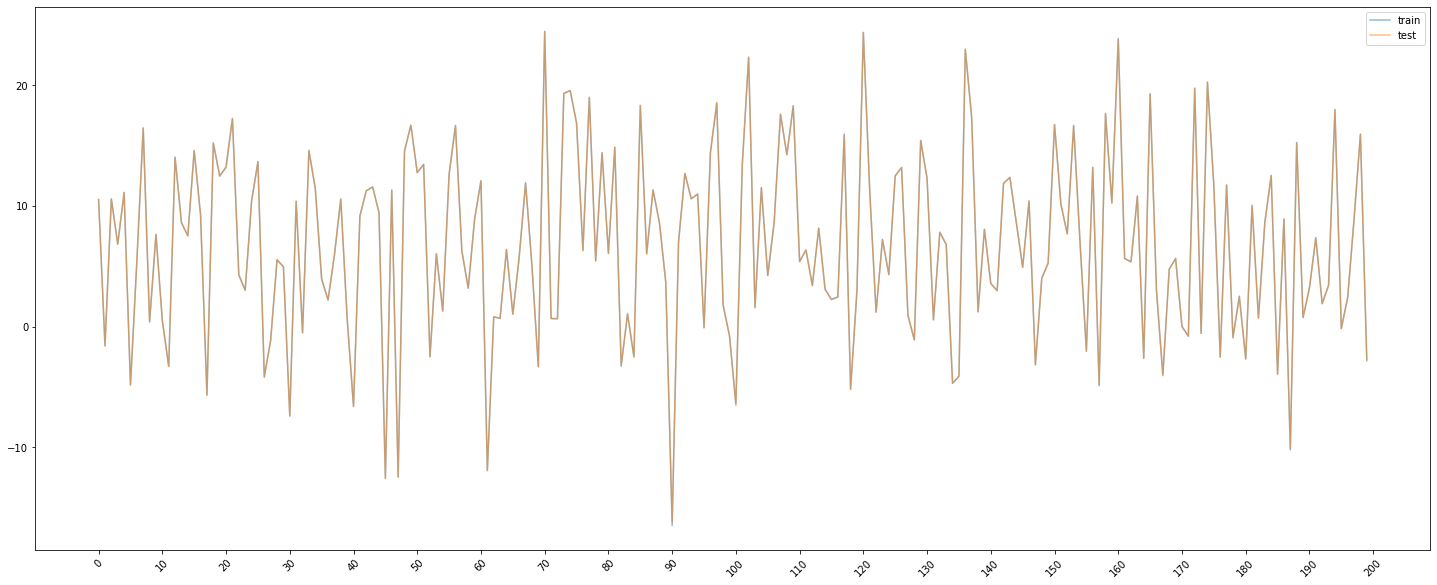

In [178]:
fig = plt.figure(figsize=(25, 10))
plt.plot(median_train, alpha=0.5)
plt.plot(median_test, alpha=0.5)
plt.xticks(range(0, len(features)+1, 10), range(0, len(features)+1, 10), rotation=45)
plt.legend(['train', 'test']);

__Выводы__
- распределение основных статистик обучающей и тестовой выборки практически идентичны
- распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной также практически идентичны

## 5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [193]:
correlation = training_data.drop('ID_code', axis=1).corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Странно, проверим численно

In [241]:
X = training_data['var_6'].values
Y = training_data['target'].values

In [242]:
x_std = X.mean()
y_std = Y.mean()

In [243]:
(sum((X - x_std) * (Y - y_std))) / np.sqrt(sum(np.square((X - x_std))) * sum(np.square((Y - y_std))))

0.06673084561268289

Вроде все верно

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

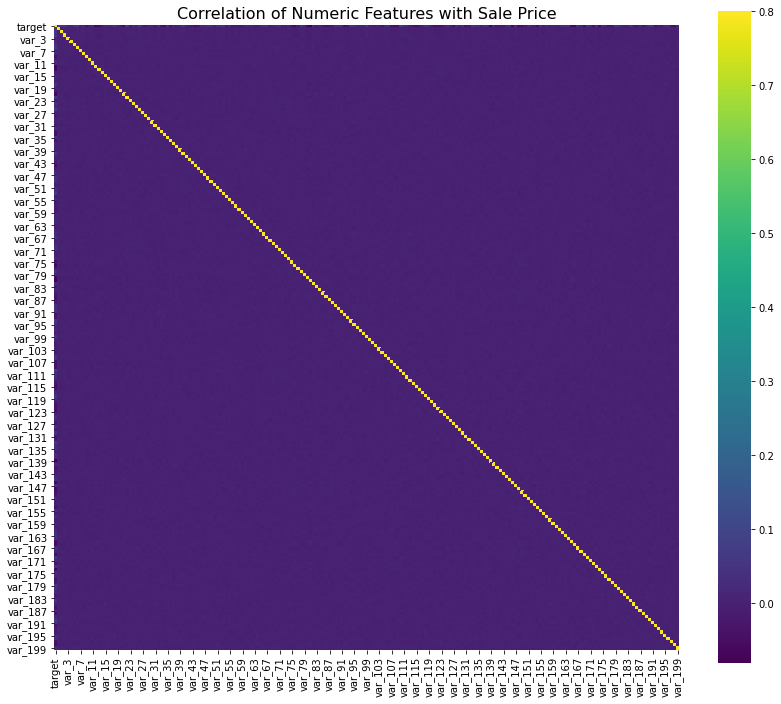

In [194]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

Text(0, 0.5, 'Density')

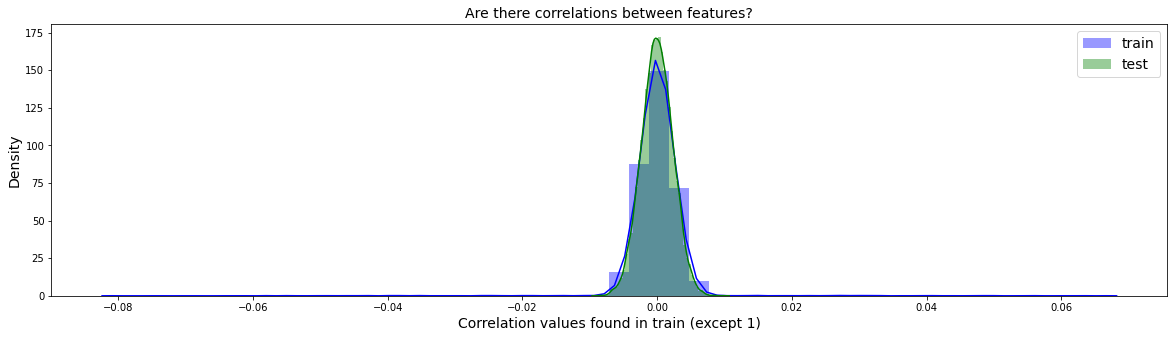

In [245]:
train_correlations = training_data.drop('ID_code', axis=1).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = training_data.drop('ID_code', axis=1).columns.tolist()
columns.remove("target")

test_correlations = test_data.drop('ID_code', axis=1).corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

<AxesSubplot:>

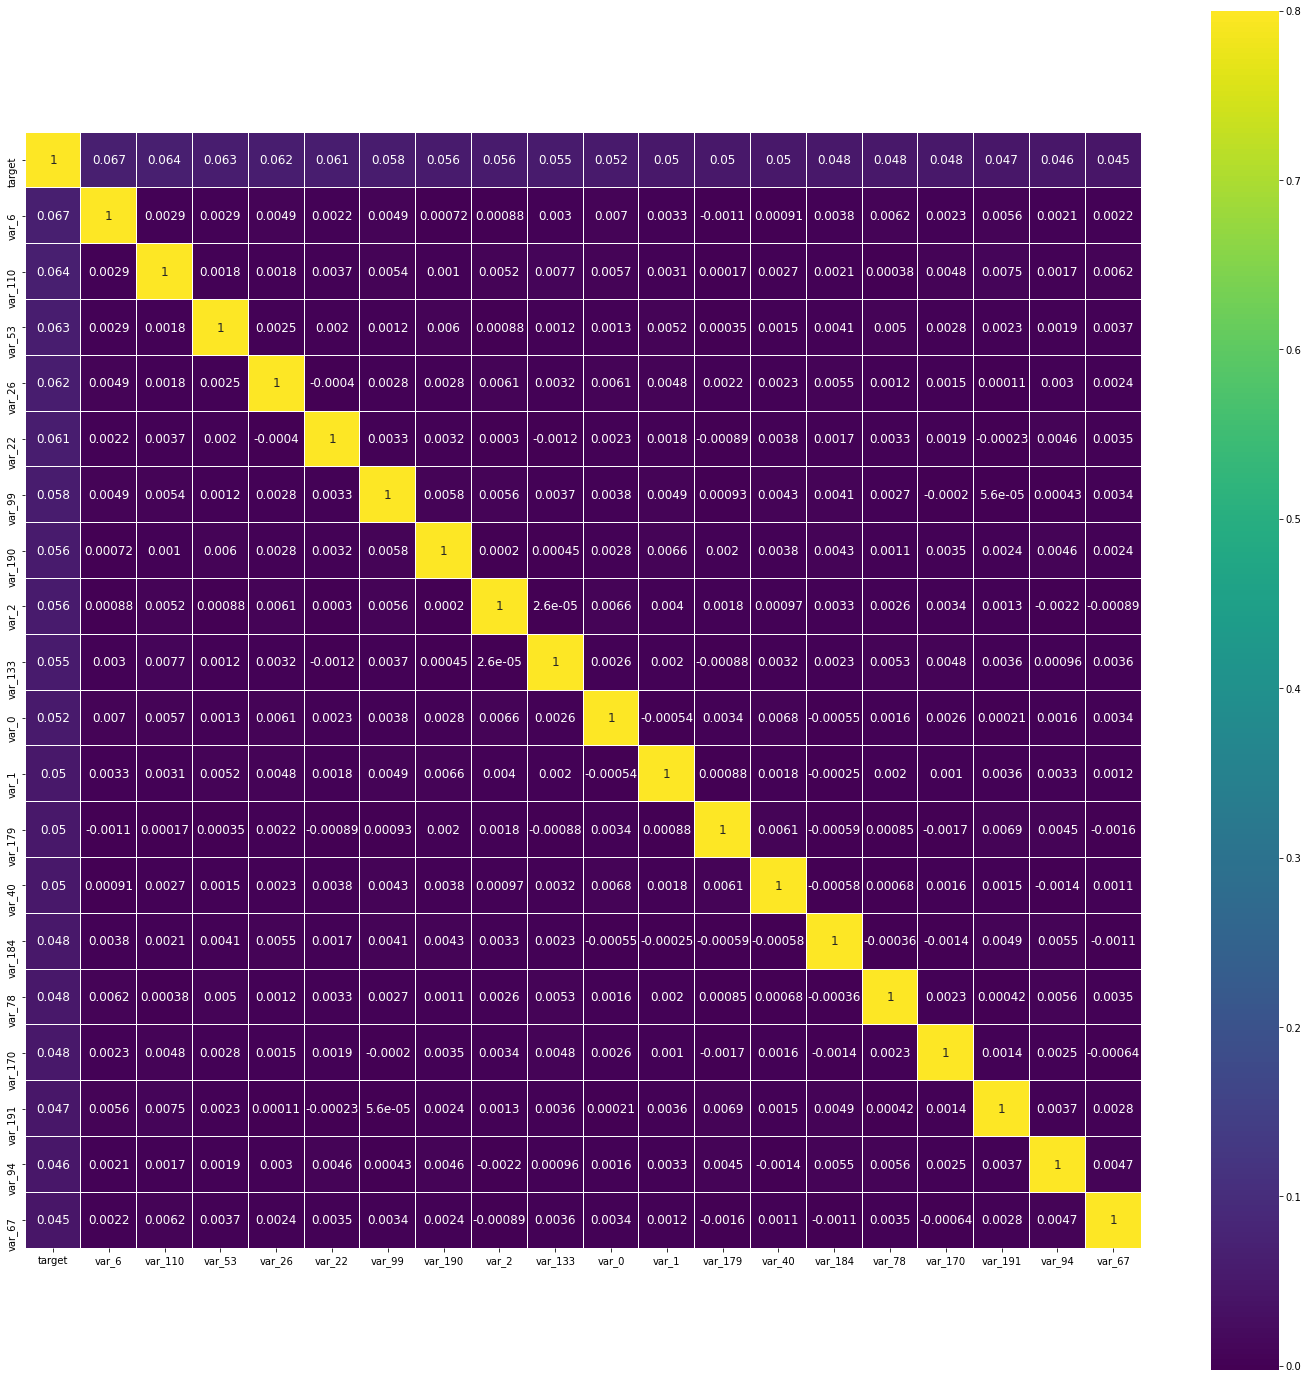

In [250]:
k = 20
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(training_data[cols].values.T)
fig, axes = plt.subplots(figsize = (25, 25))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
);

__Выводы__  
Получается что линейно зависимых признаков у нас нет.

## 6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [253]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": -1}
target = training_data.target

forest = RandomForestClassifier(**parameters)
forest.fit(training_data.drop('ID_code', axis=1).fillna(-9999).drop("target", axis=1), target)

CPU times: user 59.6 s, sys: 240 ms, total: 59.8 s
Wall time: 9 s


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=-1, random_state=27)

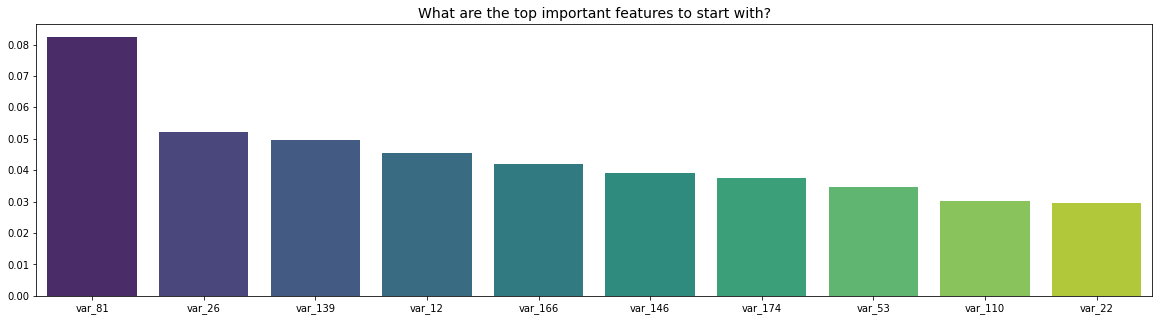

In [255]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = training_data.drop('ID_code', axis=1).drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14);

## 7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

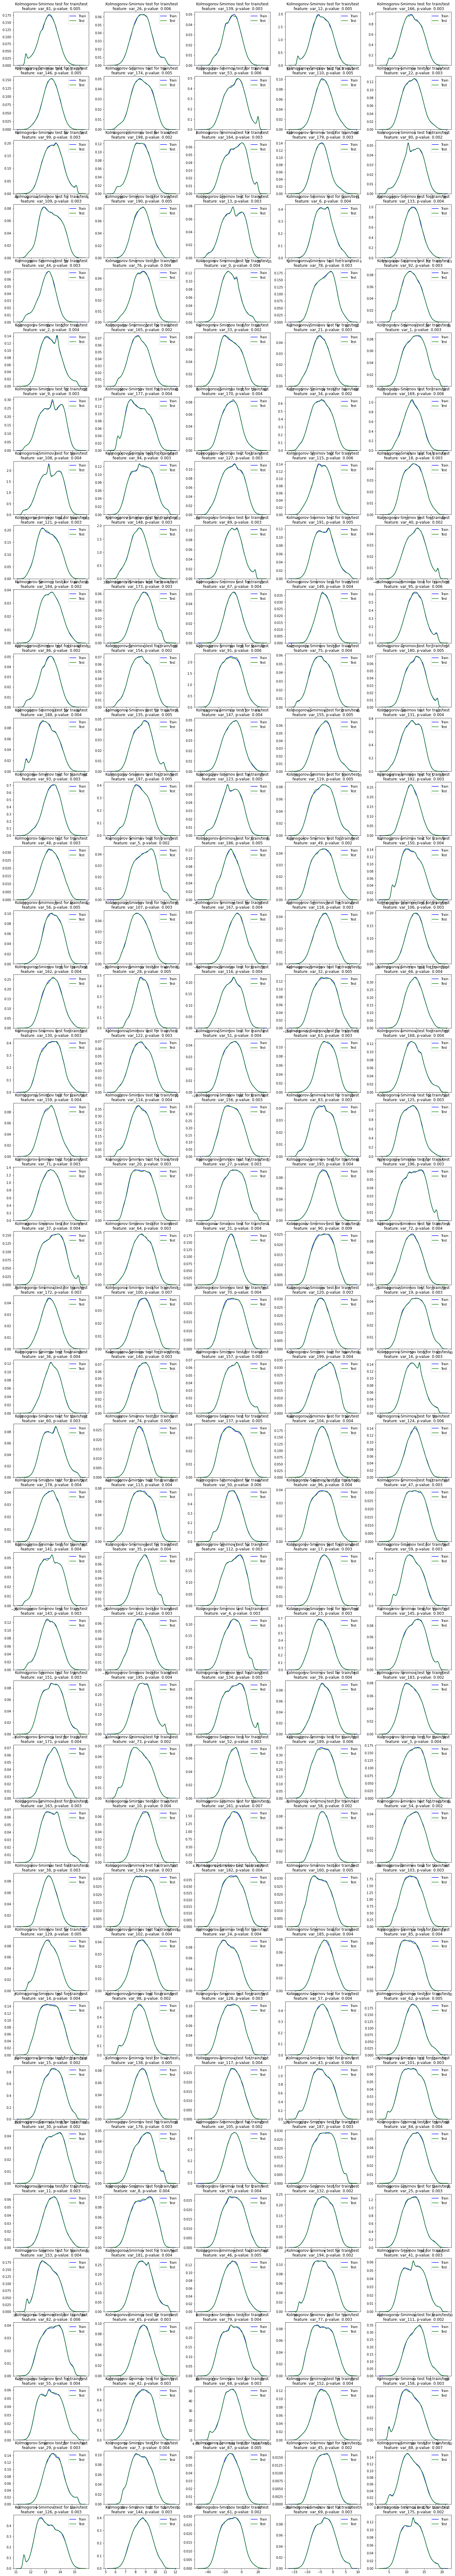

In [263]:
statistics_array = []
idx = np.argsort(importances)[::-1]
# fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig, axes = plt.subplots(40, 5, figsize=(25, 150))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        training_data[feature], test_data[feature]
    )
    statistics_array.append(statistic)

    sns.kdeplot(training_data[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(test_data[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

__Выводы__
- распределения признаков на обучающей и тестовой выборках практически идентичны